## SVD practice with sine waves


In [36]:
import numpy as np
from scipy.stats import norm
from scipy.signal import chirp
from scipy.optimize import minimize
from matplotlib import pyplot as plt

In [2]:
# Take sine wave and discretize into 200 numbers

x = np.linspace(0, np.pi, 200)
ds = np.cos(x)
# Should be 200x1 vector containing sampled sine wave

# Create random wide matrix 16x200
A = norm.rvs(size = (16,200)) 
# Multiply
y1 = np.dot(A, ds)

# Do this for 99 more realizations 
for i in range(1,100):
    ds = np.cos(x + np.random.uniform(0, np.pi)) #i*np.pi/100)
    y1 = np.vstack((y1, np.dot(A, ds)))

    
_, s, v = np.linalg.svd(y1)
# first two v vectors will have I and Q components 

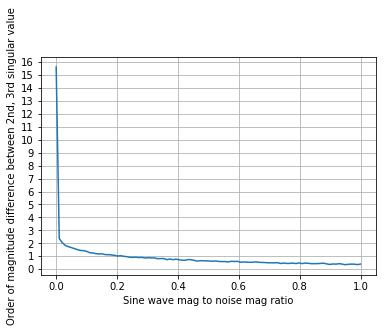

In [3]:

# Add noise to sine signals, see how SVDs change
noise_scales = np.linspace(0, 1, 100)
mag_dff = []

# Create random wide matrix 16x200
A = norm.rvs(size = (16,200))  

for scale in noise_scales:
    x = np.linspace(0, np.pi, 200)
    ds = np.cos(x)
    # 200x1 vector containing sampled sine wave    
    y1 = np.dot(A, ds)

    # 99 more realizations 
    for i in range(1,100):
        # Add in noise to each signal
        ds = np.cos(x + np.random.uniform(0, np.pi)) + np.random.uniform(-scale, scale, 200)#i*np.pi/100)
        y1 = np.vstack((y1, np.dot(A, ds)))
    
    _, s, v = np.linalg.svd(y1)
    mag_dff.append(np.log10(s[1]/s[2]))

plt.ylabel('Order of magnitude difference between 2nd, 3rd singular value')
plt.yticks(np.arange(0, 18, 1.0))
plt.xlabel('Sine wave mag to noise mag ratio')
plt.grid(b=True)
plt.plot(noise_scales, mag_dff)
plt.show()

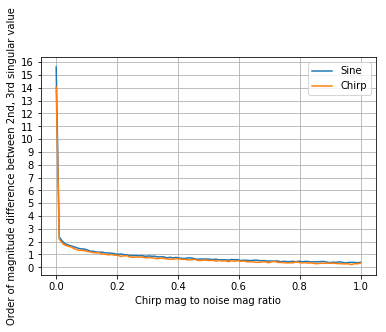

In [4]:
A = norm.rvs(size = (16,200)) 

noise_scales = np.linspace(0, 1, 100)
mag_dff2 = []

for scale in noise_scales:
    # Try test with chirps instead of sine waves
    t = np.linspace(0, 4.5e-9, 200)
    f0, f1 = 1e9, 20e9
    t1 = 4.5e-9
    chirpsig = chirp(t, f0, t1, f1, phi = 0)

    y1 = np.dot(A, chirpsig)
    # 99 more realizations 
    for i in range(1,100):
        # Add in noise to each signal
        # Phase is in degrees for this function
        dc = chirp(t, f0, t1, f1, phi = np.random.uniform(0, 360)) + np.random.uniform(-scale, scale, 200)
        y1 = np.vstack((y1, np.dot(A, dc)))

    _, s, v = np.linalg.svd(y1)
    mag_dff2.append(np.log10(s[1]/s[2]))

plt.ylabel('Order of magnitude difference between 2nd, 3rd singular value')
plt.yticks(np.arange(0, 18, 1.0))
plt.xlabel('Chirp mag to noise mag ratio')
plt.grid(b=True)
plt.plot(noise_scales, mag_dff, noise_scales, mag_dff2)
plt.legend(['Sine', 'Chirp'])
plt.show()